# Assignment #1 - Linear Regression


<font color="blue"> Sai Supreeth Segu</font>

# Introduction

* In this assignment, I will be dealing with least squares and least mean squares. We will train the model and predict the values for the unseen data using these methods. For training the model, we will use linear equations for predicting the values. So, this is called linear regression.
* After each iteration, it will try to minimize the error and update the weights accordingly.
* I have checked whether the data is clean or not and preprocessed the data. I have used the regression data from the previous assignment.
* I have calculated the values for the given data and plotted them vs expected values.
* I have calculated accuracy of the model and also plotted residual graphs.

# Data

## Description

* The features in this dataset is about all the block groups in California from the 1990 Census. 
* In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. 
* Naturally, the geographical area included varies inversely with the population density. 
* We computed distances among the centroids of each block group as measured in latitude and longitude. 
* We excluded all the block groups reporting zero entries for the independent and dependent variables. 
* The final data contained 20,640 observations on 9 variables. 
* The dependent variable is median house value.

## Reading the Data

In [2]:
import pandas as pd
f = pd.read_csv("cali_housing.csv")
f.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Normalizing the Data

In [3]:
for i in range(8):
    max_ = f.iloc[:,i].max();
    min_ = f.iloc[:,i].min();
    f.iloc[:,i] = f.iloc[:,i].apply(lambda x: ((x-min_)/(max_-min_)))
f.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0


## Preprocessing the Data

### Checking for Null values in Data

In [3]:
import numpy as np
np.any(f.isnull())

longitude           False
latitude            False
housingMedianAge    False
totalRooms          False
totalBedrooms       False
population          False
households          False
medianIncome        False
medianHouseValue    False
dtype: bool

### Checking for missing values in Data

In [4]:
np.any(f.isna())

longitude           False
latitude            False
housingMedianAge    False
totalRooms          False
totalBedrooms       False
population          False
households          False
medianIncome        False
medianHouseValue    False
dtype: bool

In [5]:
f.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083318,0.039869,0.081983,0.232464,206855.816909
std,0.199555,0.226988,0.246776,0.055486,0.065371,0.031740,0.062873,0.131020,115395.615874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045624,0.021974,0.045881,0.142308,119600.000000
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301,179700.000000
75%,0.631474,0.549416,0.705882,0.080014,0.100248,0.048264,0.099326,0.292641,264725.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


## Plot for understanding or analysis

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(18,16))
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.plot(f.iloc[:50,i])
    plt.title("Line Graph")
    plt.ylabel(f.columns.values[i])
    plt.xlabel("Records")
    fig.tight_layout()

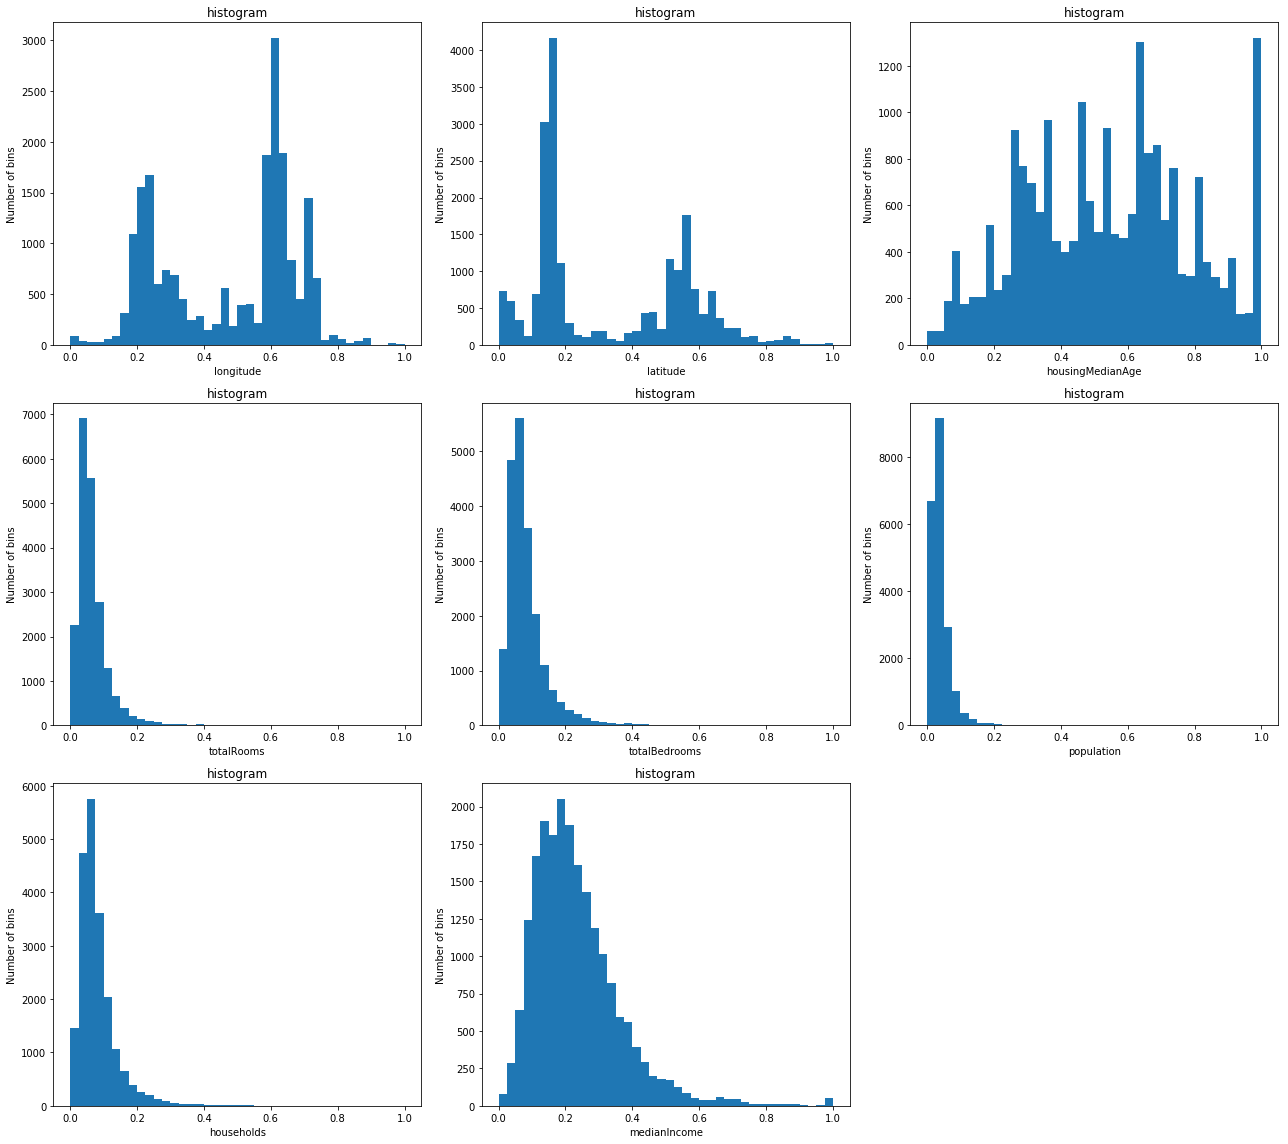

In [7]:
fig = plt.figure(figsize=(18,16))
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.hist(f.iloc[:,i],40)
    plt.title("histogram")
    plt.xlabel(f.columns.values[i])
    plt.ylabel("Number of bins")
    fig.tight_layout()

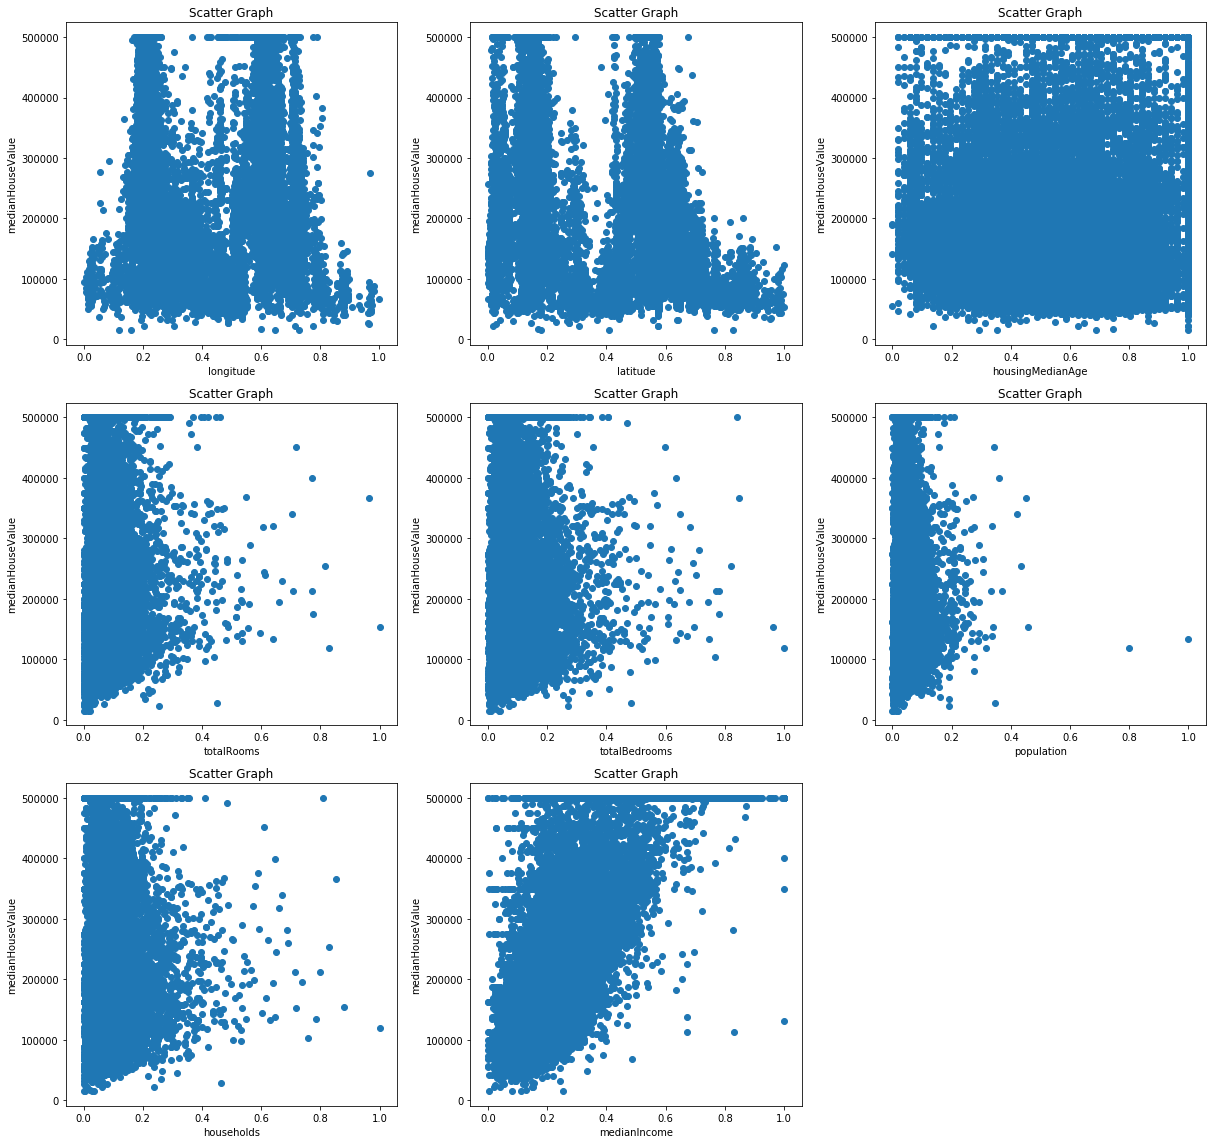

In [8]:
fig = plt.figure(figsize=(17,16))
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.scatter(f.iloc[:,i], f.loc[:,'medianHouseValue'])
    plt.title("Scatter Graph")
    plt.xlabel(f.columns.values[i])
    plt.ylabel("medianHouseValue")
    fig.tight_layout()

## Preliminary Observation

* For doing preprocessing, I have checked for missing values and null values but it doesn't have any of those values. So, data is already preprocessed well.
* I have normalized the data because it will produce more accurate results when we use neural networks.
* From the scatter plot, we can say that most of the data is accumulated at low values and there are few points with higher values for most of the features.

# Method

## Review

* Liner model predicts values using the equation Y = wx+c and the equation is formed by training a model. The number of variables of x depends on the number of features of data.
Liner models are simple to implement and can avoid overfitting. There are two types of linear regression models.


 1. Least Square : After plotting the cost function of the model, we will predict local or global minima for finding the best fit for the data. This can be find by calculating dy/dx of the function and equating it with 0. This can be done using norm equation. The weight(or slope of the line) is calculated using    
$$
\begin{align}
w &= \big(X^\top X\big)^{-1} X^\top T
\end{align}
$$

    Then we will predict Y using formula 
$$
\begin{align}
Y &= w^\top x
\end{align}
$$

    This method is easy to implement but calculating inverse is order of O(n^3). If the data is large it takes more time to implement. So, we are dealing with alternative method. This method is preferable for smaller size of data.


 2. Least Mean Square: In this method, we will calculate w using gradient descent. If we start from a point on the cost function, then we will converge towards minima. The rate at which we move the point is alpha. If we take alpha value more then there will be possibility to diverge the minima and if we take it's value less then we converge towards minima slowly. We update our weight using error we get when we used previous weight in the each iteration. 
    To compute weight we use

$$
w^{(k+1)} = w^{(k)} - alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

## Code Implementation

* Firstly, we created a abstract class BaseModel for all the machine learning models containing train and use abstract methods. So all the classes which are inheriting need to implement these methods.
* Then we had made a class Linear model inheriting BaseModel and we are intializing w. We are also checking whether the given matrix is 2D or not. We have written a method for biasing and created abstract methods for train and use.
* In Least square, we are adding bias and finding the weight w from the above formula directly. We are passing data and target as arguments and in use we are predicting output by taking dot product of data and w from the train.
* In Least Mean square we made three method suse,train and train_step.The new method train_step is for updating weight using the error we are claculting in the same method. I have kept a flag for updating weight only once or we can do the same by checking if w is none or not. In the train method, we will call train_step method for every  instance of data. Finally, after getting w we will predict the output using use method.

### Super Classs Definition

In [4]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [5]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        XT = X.transpose()
        #self.w = np.linalg.inv(X.T @ X) @ X.T @ T
        self.w = (np.linalg.inv(XT.dot(X))).dot(XT).dot(T)
        return self.w  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        #print("shape", X.shape , "www", self.w.shape)
        return X.dot(self.w)
        #pass  ## TODO: replace this with your codes

### Least Mean Squares

In [6]:
import collections # for checking iterable instance
from tqdm import tqdm
# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    flag = False
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        num_iterations = 1
        #alpha = 0.01
        for i in range(num_iterations):
            for j in range(len(X)):
                self.w = self.train_step(X[j],T[j])
        return self.w
        #pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.hstack((np.ones((1)), x))
        if not (bool(self.flag)) : 
            self.w = np.zeros(len(x))
            self.flag = True
        #print(self.w.shape)
        #print(type(x))
        #print(x.shape)
        num_iterations = 1
        #self.alpha = 0.01
        #errs = []
        for i in range(num_iterations):
            loss = np.dot(x,self.w) - t
            #errs.append( np.sqrt(np.mean(loss)**2) )
            #print(x)
            #print("wwwwwwwww", self.w)
            #print("shape", x.shape , "www", loss.shape)
            #grads = self.computeGradients(x,t)
            self.w -= self.alpha*(np.multiply(x,loss))
        #fig = plt.figure(figsize=(20,16))
        #plt.subplot(1,2,1)
        #plt.plot(errs)
        return self.w
         
    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        yHat = np.dot(X,self.w)
        return np.atleast_2d(yHat).T
        

### Usage Examples

In [11]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

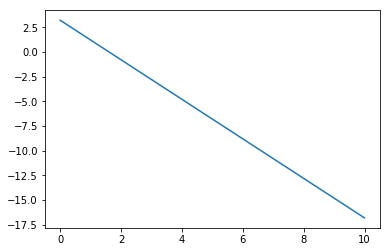

In [13]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

/Users/supreeth/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


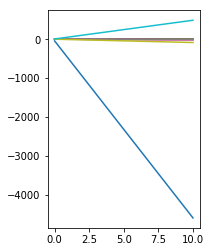

In [14]:
lms = LMS(0.1)
#print(X)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.subplot(1,2,2)
    plt.plot(lms.use(X))

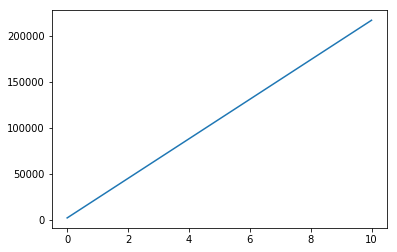

In [15]:
lms.train(X, T)
plt.plot(lms.use(X))

# Preliminary Test

In [16]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Experiments

## Description && Codes

* Here, I am plotting the predicted output values using Least squares method and Least Mean squares method for different values of alpha.
* I have plotted predicted values and expected side over side which will make easier for comparing the both.
* I have used plots and subplot for plotting the graphs.
* I have calculated Root Mean Square value for each model for knowing the accuracy of the model.
* For calculating RMSE, I have squared the errors  and took the square root of sum of the errors and then divided by number of instances of data

## Visualization of results

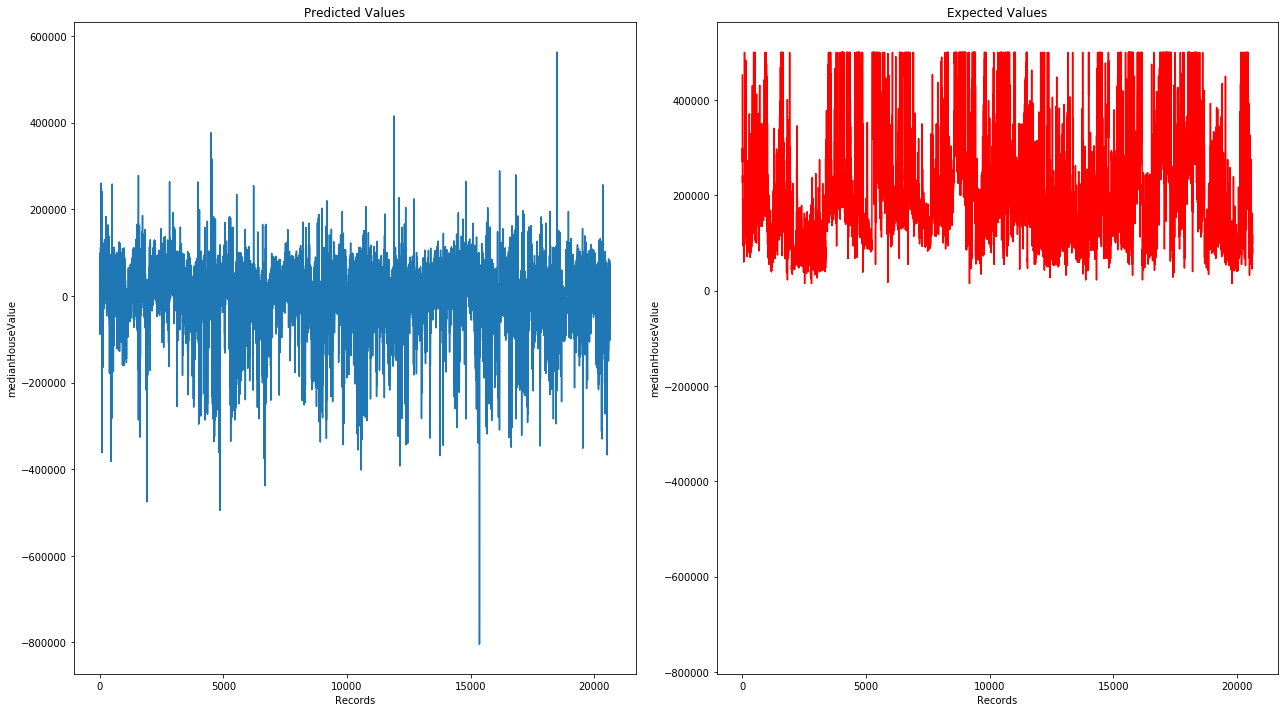

In [17]:
X = f.iloc[:,0:8].values
T = f.iloc[:,8].values
ls = LinearRegress()
ls.train(X, T)
op_values = ls.use(X)-T
fig = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.plot(op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()
plt.subplot(1,2,2)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(T,'r')
plt.title('Expected Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()

Alpha rate is 0.001


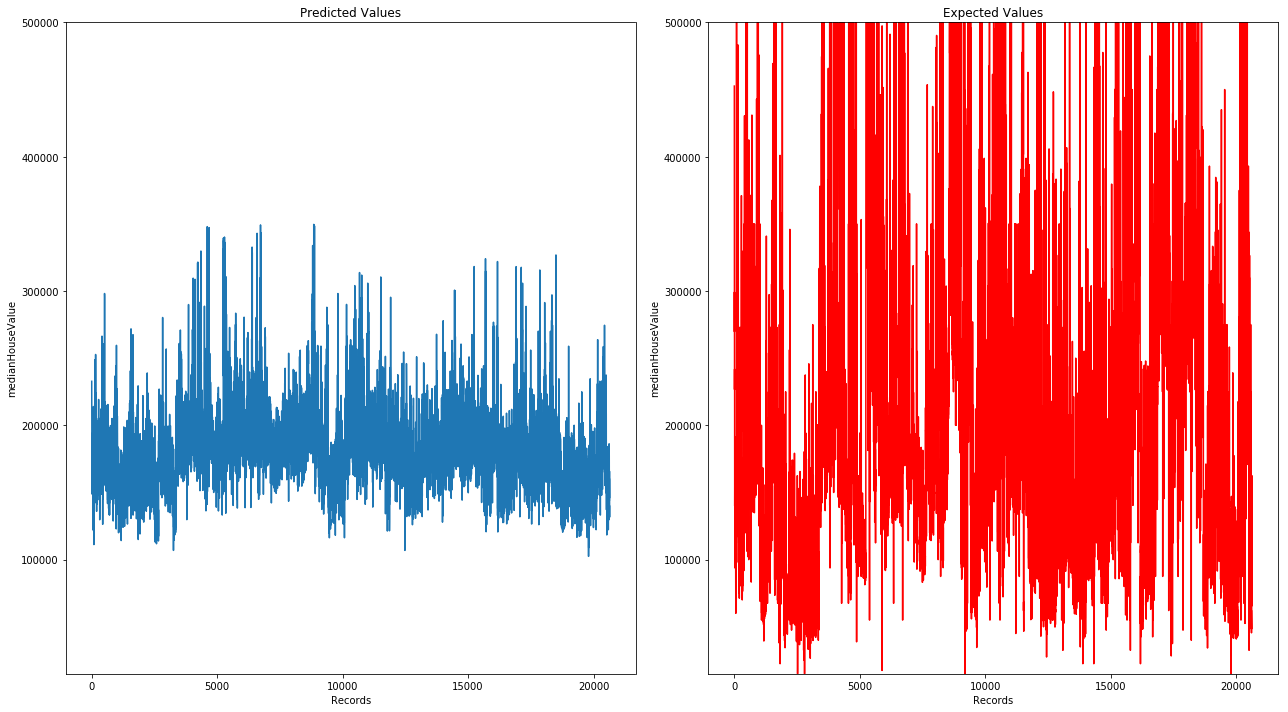

In [18]:
X = f.iloc[:,0:8].values
T = f.iloc[:,8].values
lms = LMS(0.001)
print("Alpha rate is 0.001")
lms.train(X, T)
#plt.plot(lms.use(X))
op_values = lms.use(X)
fig = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()
plt.subplot(1,2,2)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(T,'r')
plt.title('Expected Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()

Alpha rate is 0.01


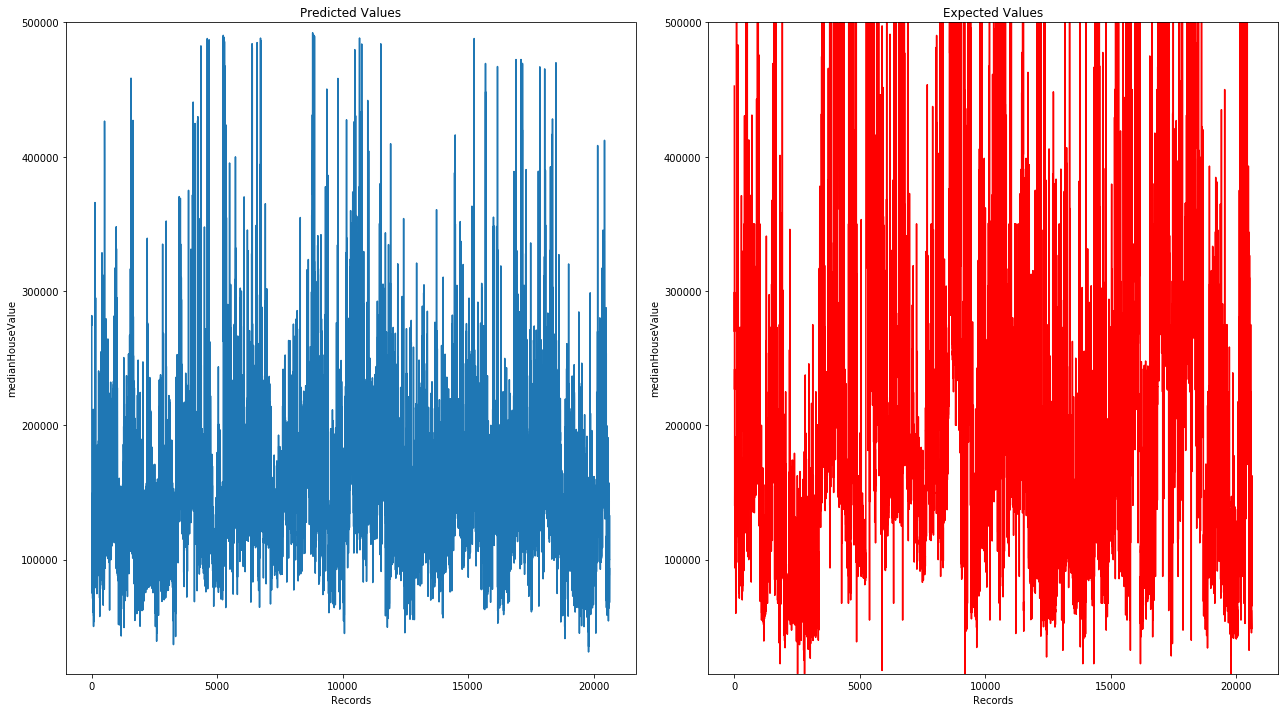

In [19]:
X = f.iloc[:,0:8].values
T = f.iloc[:,8].values
lms = LMS(0.01)
print("Alpha rate is 0.01")
lms.train(X, T)
#plt.plot(lms.use(X))
op_values = lms.use(X)
fig = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()
plt.subplot(1,2,2)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(T,'r')
plt.title('Expected Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()

Alpha rate is 0.1


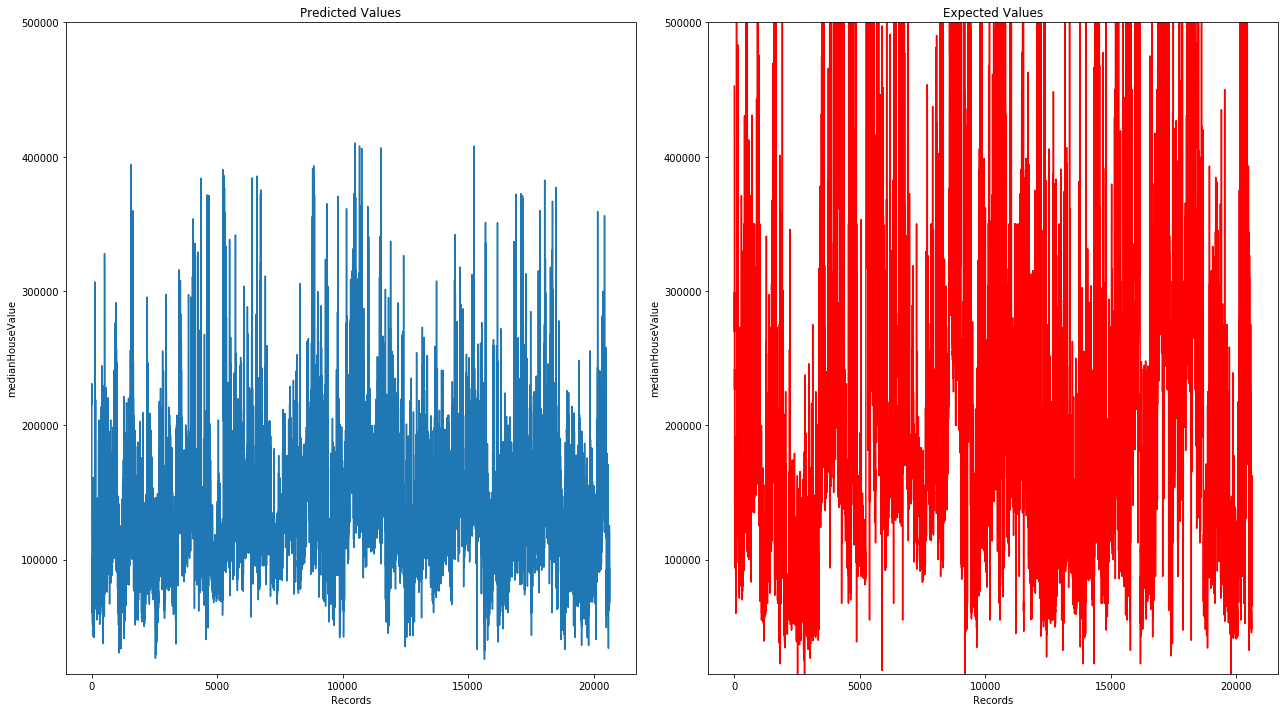

In [20]:
X = f.iloc[:,0:8].values
T = f.iloc[:,8].values
lms = LMS(0.1)
print("Alpha rate is 0.1")
lms.train(X, T)
#plt.plot(lms.use(X))
op_values = lms.use(X)
fig = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()
plt.subplot(1,2,2)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(T,'r')
plt.title('Expected Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()

## Analysis / Camparison of Algorithms

## Finding RMSE of LS

In [8]:
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))/len(T)
X = f.iloc[:,0:8].values
T = f.iloc[:,8].values
ls = LinearRegress()
ls.train(X, T)
print('Root Mean Square for LS:', rmse(T,ls.use(X)))

Root Mean Square for LS: 483.8536944406967


## Finding RMSE of LMS

In [22]:
lms = LMS(0.001)
lms.train(X,T)
print('Root Mean Square for LMS with alpha 0.001:', rmse(T,lms.use(X)))

Root Mean Square for LMS with alpha 0.001: 120651.63839680102


In [23]:
lms = LMS(0.01)
lms.train(X,T)
print('Root Mean Square for LMS with alpha 0.01:', rmse(T,lms.use(X)))

Root Mean Square for LMS with alpha 0.01: 137507.94220112258


In [24]:
lms = LMS(0.1)
lms.train(X,T)
print('Root Mean Square for LMS with alpha 0.1:', rmse(T,lms.use(X)))

Root Mean Square for LMS with alpha 0.1: 142277.6472896584


* I have performed some experiments with the data and have plotted the predicted and expected values to know the difference between them.
* Using LMS model, I have performed for different values of alpha. From the values of RMSE we can say that model with alpha value 0.001 is performing better than the other two values.
* But for lesser values it takes more time when data is more and there is not much difference between the three RMSE values and also from the visualization 0.01 is more closer to excpected values. So, model with alpha value 0.01 is ideal for larger datasets.
* From the values of RMSE, we can clearly say that Least square is performing better than the other model.

## Extra Credit

## Least and most Significant Features

* From the visualization of data we can clearly say that population feature is same for the most of the data and I have ran the models removing this feature and also I have calculated RMSE values removing different features of data and the RMSE values I got was 
  * When alpha value is 0.001
        Without longitude feature is 121181
        Without latitude feature is 119786
        Without housingMedianAge feature is 120968
        Without totalRooms feature is 120631
        Without totalBedrooms feature is 120678
        Without population feature is 120652
        Without households feature is 120669
        Without medianIncome feature is 119519
        The original RMSE value is 120651
  * When alpha value is 0.01
        Without longitude feature is 133630
        Without latitude feature is 141240
        Without housingMedianAge feature is 136759
        Without totalRooms feature is 137417
        Without totalBedrooms feature is 137519
        Without population feature is 137498
        Without households feature is 137479
        Without medianIncome feature is 135886
        The original RMSE value is 137507
* From the above values we can clearly say that population is least significant feature as the values are not changing much and the most significant features are latitude,longitude and housingMedianAge.

### Plot without least significant feature

Alpha rate is 0.001
Root Mean Square for LMS with alpha 0.001: 120652.69383457843


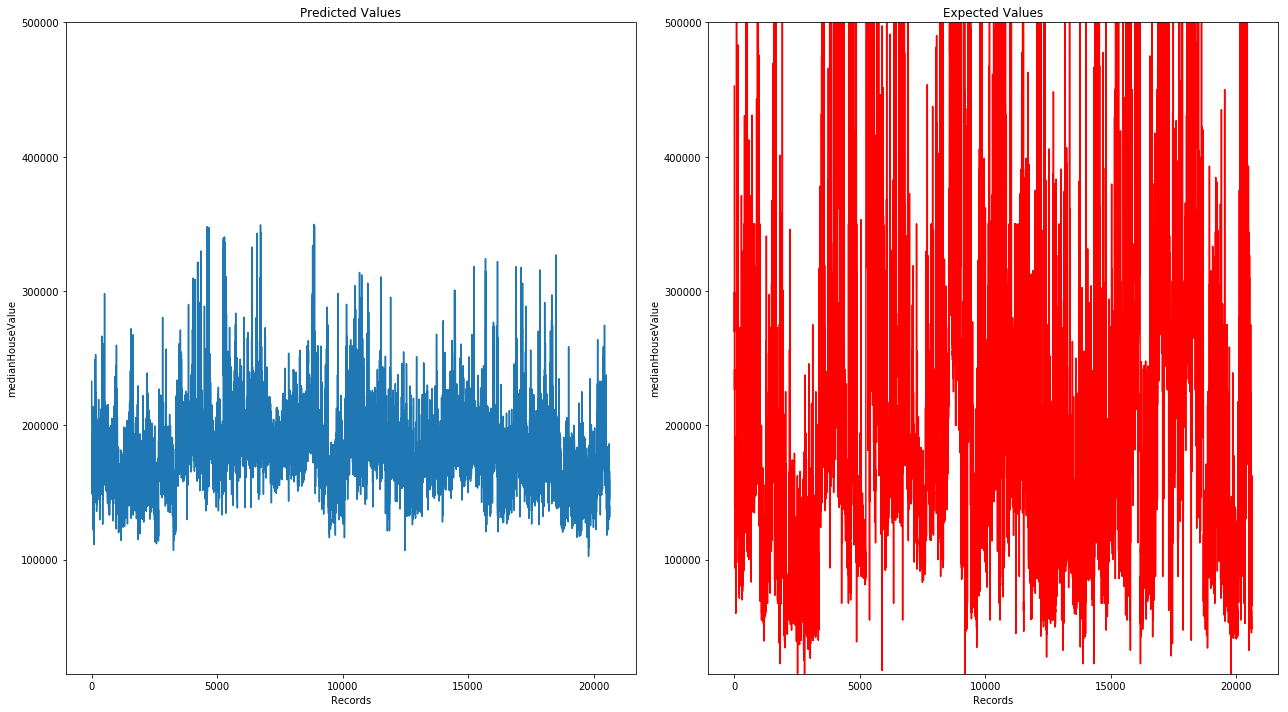

In [26]:
X = f.iloc[:,[0,1,2,3,4,6,7]].values
T = f.iloc[:,8].values
lms = LMS(0.001)
print("Alpha rate is 0.001")
lms.train(X, T)
#plt.plot(lms.use(X))
op_values = lms.use(X)
print('Root Mean Square for LMS with alpha 0.001:', rmse(T,lms.use(X)))
fig = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()
plt.subplot(1,2,2)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(T,'r')
plt.title('Expected Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()

Alpha rate is 0.01
Root Mean Square for LMS with alpha 0.01: 137498.99641456903


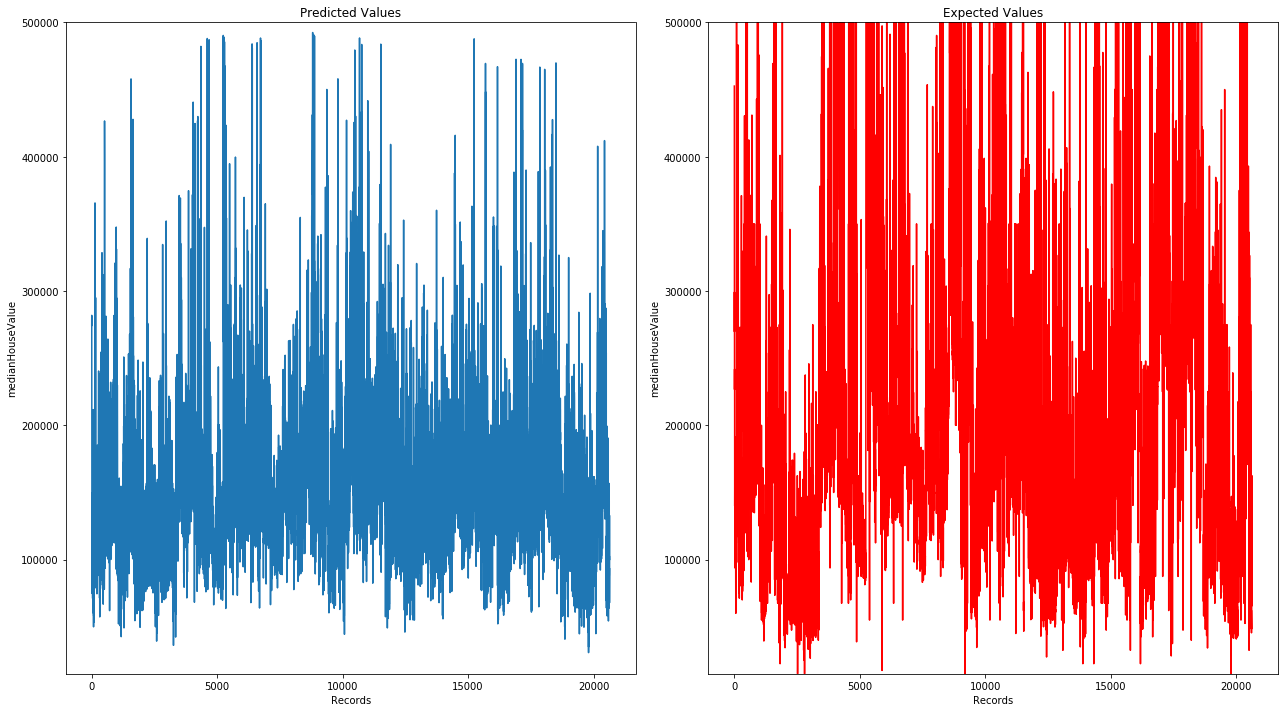

In [27]:
X = f.iloc[:,[0,1,2,3,4,6,7]].values
T = f.iloc[:,8].values
lms = LMS(0.01)
print("Alpha rate is 0.01")
lms.train(X, T)
#plt.plot(lms.use(X))
op_values = lms.use(X)
print('Root Mean Square for LMS with alpha 0.01:', rmse(T,lms.use(X)))
fig = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()
plt.subplot(1,2,2)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(T,'r')
plt.title('Expected Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()

Alpha rate is 0.1
Root Mean Square for LMS with alpha 0.1: 142050.25870443607


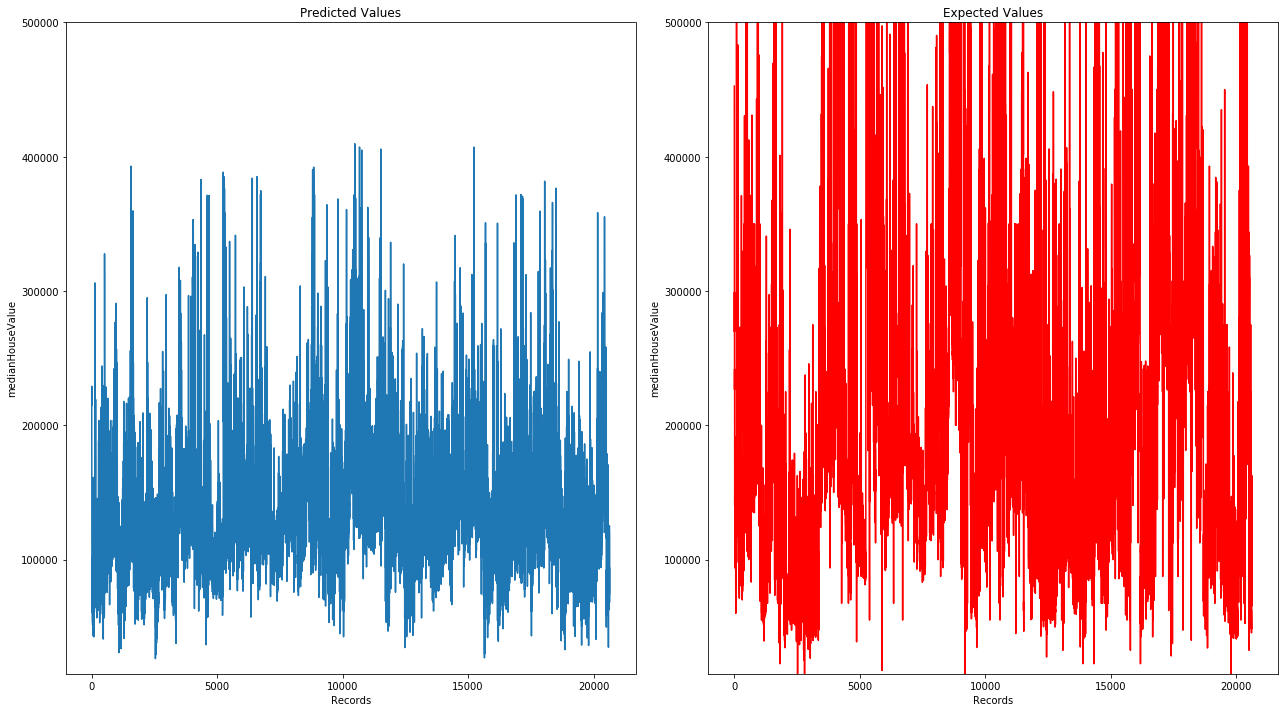

In [28]:
X = f.iloc[:,[0,1,2,3,4,6,7]].values
T = f.iloc[:,8].values
lms = LMS(0.1)
print("Alpha rate is 0.1")
lms.train(X, T)
#plt.plot(lms.use(X))
op_values = lms.use(X)
print('Root Mean Square for LMS with alpha 0.1:', rmse(T,lms.use(X)))
fig = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()
plt.subplot(1,2,2)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(T,'r')
plt.title('Expected Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()

### Plot without most significant features

Alpha rate is 0.001
Root Mean Square for LMS with alpha 0.001: 120114.42095439733


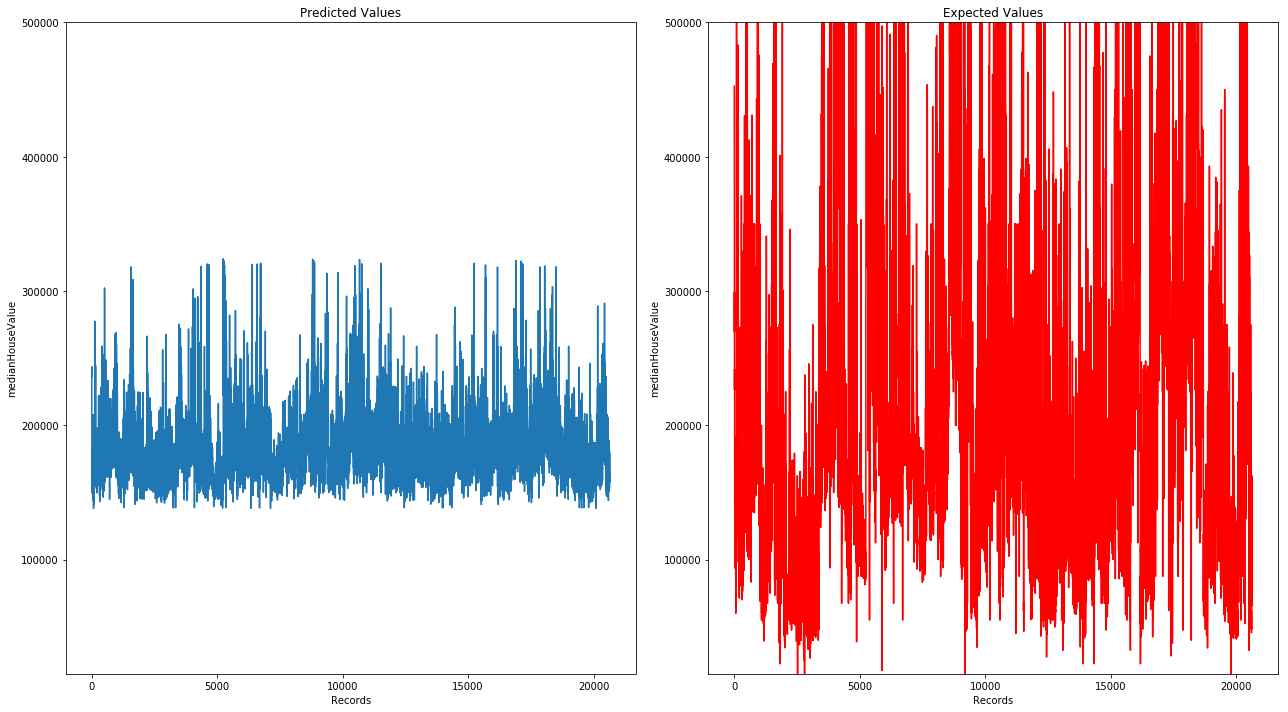

In [29]:
X = f.iloc[:,[3,4,5,6,7]].values
T = f.iloc[:,8].values
lms = LMS(0.001)
print("Alpha rate is 0.001")
lms.train(X, T)
#plt.plot(lms.use(X))
op_values = lms.use(X)
print('Root Mean Square for LMS with alpha 0.001:', rmse(T,lms.use(X)))
fig = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()
plt.subplot(1,2,2)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(T,'r')
plt.title('Expected Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()

Alpha rate is 0.01
Root Mean Square for LMS with alpha 0.01: 137603.716111707


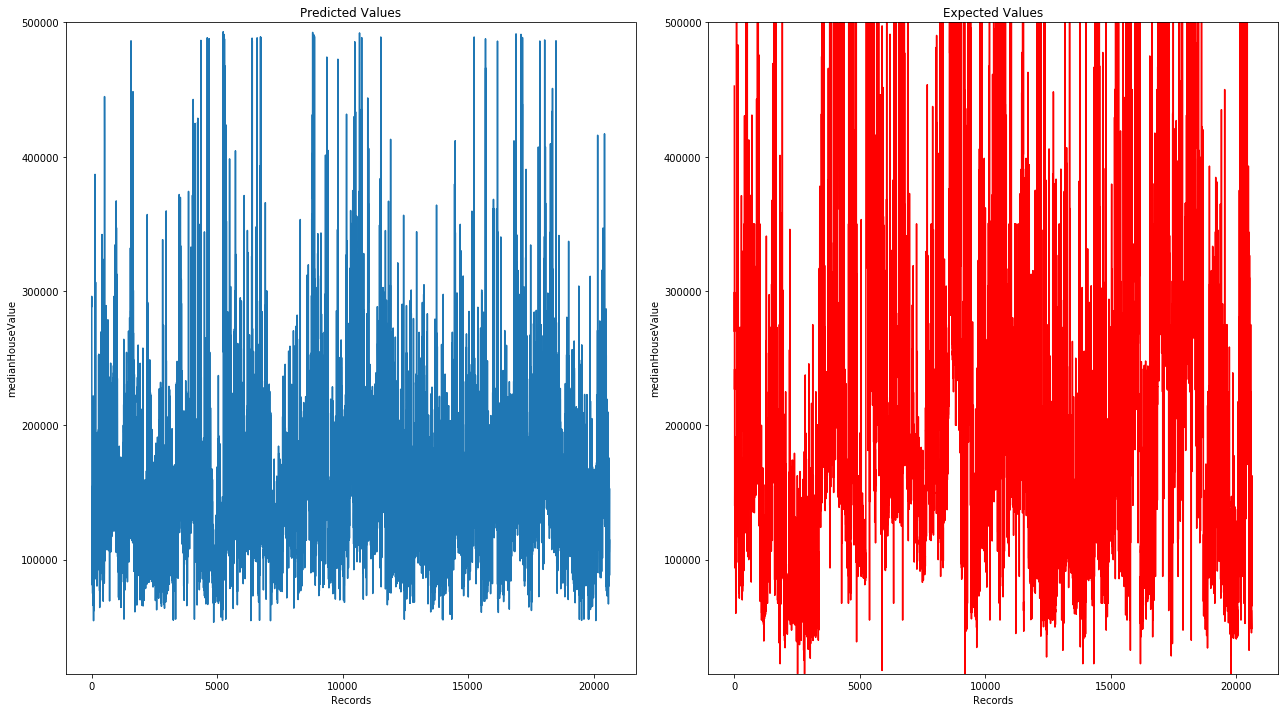

In [30]:
X = f.iloc[:,[3,4,5,6,7]].values
T = f.iloc[:,8].values
lms = LMS(0.01)
print("Alpha rate is 0.01")
lms.train(X, T)
#plt.plot(lms.use(X))
op_values = lms.use(X)
print('Root Mean Square for LMS with alpha 0.01:', rmse(T,lms.use(X)))
fig = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()
plt.subplot(1,2,2)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(T,'r')
plt.title('Expected Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()

Alpha rate is 0.1
Root Mean Square for LMS with alpha 0.1: 150591.4575725082


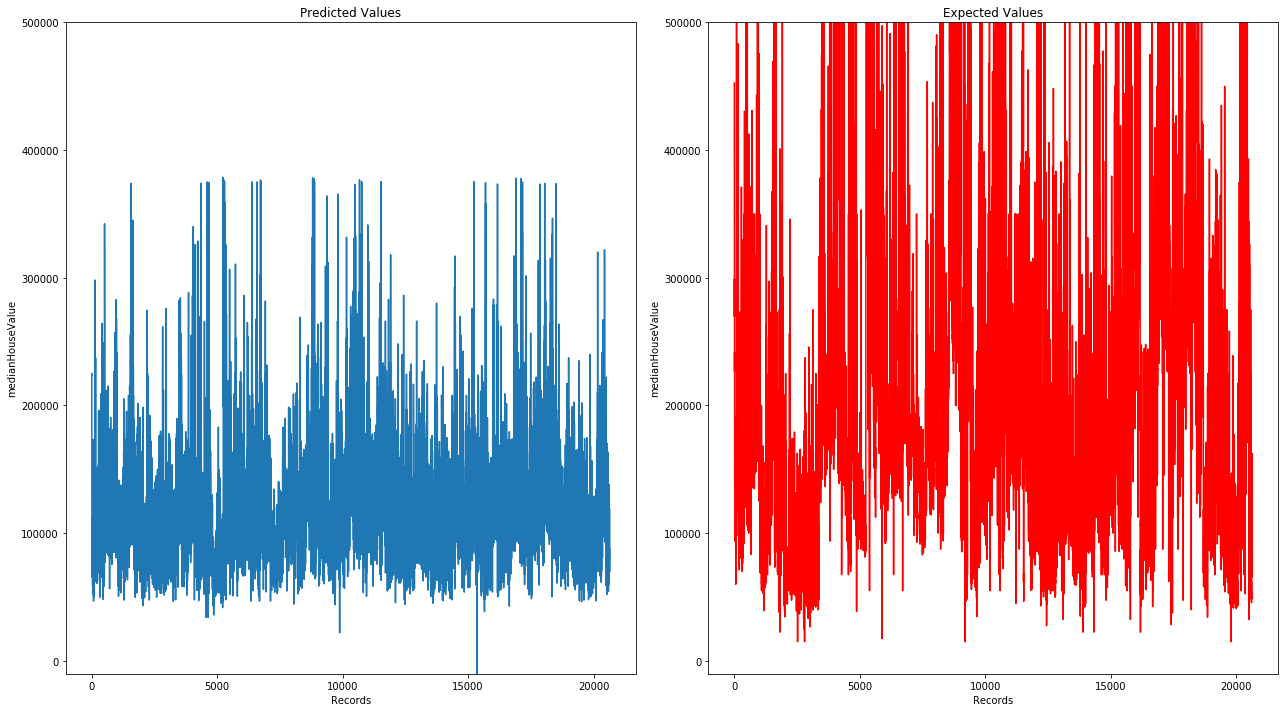

In [31]:
X = f.iloc[:,[3,4,5,6,7]].values
T = f.iloc[:,8].values
lms = LMS(0.1)
print("Alpha rate is 0.1")
lms.train(X, T)
#plt.plot(lms.use(X))
op_values = lms.use(X)
print('Root Mean Square for LMS with alpha 0.1:', rmse(T,lms.use(X)))
fig = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()
plt.subplot(1,2,2)
plt.ylim([min(min(T),min(op_values)),max(max(T),max(op_values))])
plt.plot(T,'r')
plt.title('Expected Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()

In [32]:
for i in range(8):
    X = f.iloc[:,i].values
    T = f.iloc[:,8].values
    X = np.atleast_2d(X).T
    lms = LMS(0.1)
    print("Alpha rate is 0.1")
    lms.train(X, T)
    #plt.plot(lms.use(X))
    op_values = lms.use(X)
    print('Root Mean Square for LMS with alpha 0.1 and feature :', i, rmse(T,lms.use(X)))

Alpha rate is 0.1
Root Mean Square for LMS with alpha 0.1 and feature : 0 165239.66876313466
Alpha rate is 0.1
Root Mean Square for LMS with alpha 0.1 and feature : 1 135268.7863064708
Alpha rate is 0.1
Root Mean Square for LMS with alpha 0.1 and feature : 2 176215.42661192408
Alpha rate is 0.1
Root Mean Square for LMS with alpha 0.1 and feature : 3 162462.46470829583
Alpha rate is 0.1
Root Mean Square for LMS with alpha 0.1 and feature : 4 163806.50039456677
Alpha rate is 0.1
Root Mean Square for LMS with alpha 0.1 and feature : 5 163869.45824437536
Alpha rate is 0.1
Root Mean Square for LMS with alpha 0.1 and feature : 6 163965.072862106
Alpha rate is 0.1
Root Mean Square for LMS with alpha 0.1 and feature : 7 149695.44326332596


In [33]:
for i in range(8):
    X = f.iloc[:,i].values
    T = f.iloc[:,8].values
    X = np.atleast_2d(X).T
    lms = LMS(0.01)
    print("Alpha rate is 0.01")
    lms.train(X, T)
    #plt.plot(lms.use(X))
    op_values = lms.use(X)
    print('Root Mean Square for LMS with alpha 0.01 and feature :', i, rmse(T,lms.use(X)))

Alpha rate is 0.01
Root Mean Square for LMS with alpha 0.01 and feature : 0 133880.24117766262
Alpha rate is 0.01
Root Mean Square for LMS with alpha 0.01 and feature : 1 127805.30401329976
Alpha rate is 0.01
Root Mean Square for LMS with alpha 0.01 and feature : 2 139152.90973558088
Alpha rate is 0.01
Root Mean Square for LMS with alpha 0.01 and feature : 3 130912.24157152818
Alpha rate is 0.01
Root Mean Square for LMS with alpha 0.01 and feature : 4 130755.94483457317
Alpha rate is 0.01
Root Mean Square for LMS with alpha 0.01 and feature : 5 130632.17622006615
Alpha rate is 0.01
Root Mean Square for LMS with alpha 0.01 and feature : 6 130776.76156240335
Alpha rate is 0.01
Root Mean Square for LMS with alpha 0.01 and feature : 7 137294.0371576121


In [34]:
for i in range(8):
    X = f.iloc[:,i].values
    T = f.iloc[:,8].values
    X = np.atleast_2d(X).T
    lms = LMS(0.001)
    print("Alpha rate is 0.001")
    lms.train(X, T)
    #plt.plot(lms.use(X))
    op_values = lms.use(X)
    print('Root Mean Square for LMS with alpha 0.001 and feature :', i, rmse(T,lms.use(X)))

Alpha rate is 0.001
Root Mean Square for LMS with alpha 0.001 and feature : 0 117616.79730184682
Alpha rate is 0.001
Root Mean Square for LMS with alpha 0.001 and feature : 1 120032.44390990418
Alpha rate is 0.001
Root Mean Square for LMS with alpha 0.001 and feature : 2 119245.5228153969
Alpha rate is 0.001
Root Mean Square for LMS with alpha 0.001 and feature : 3 118134.73146357524
Alpha rate is 0.001
Root Mean Square for LMS with alpha 0.001 and feature : 4 118125.57908180714
Alpha rate is 0.001
Root Mean Square for LMS with alpha 0.001 and feature : 5 118119.8442178415
Alpha rate is 0.001
Root Mean Square for LMS with alpha 0.001 and feature : 6 118127.7057662418
Alpha rate is 0.001
Root Mean Square for LMS with alpha 0.001 and feature : 7 120037.31594472431


In [9]:
for i in range(8):
    X = f.iloc[:,i].values
    T = f.iloc[:,8].values
    X = np.atleast_2d(X).T
    lms = LMS(0.0001)
    print("Alpha rate is 0.0001")
    lms.train(X, T)
    #plt.plot(lms.use(X))
    op_values = lms.use(X)
    print('Root Mean Square for LMS with alpha 0.0001 and feature :', i, rmse(T,lms.use(X)))

Alpha rate is 0.0001
Root Mean Square for LMS with alpha 0.0001 and feature : 0 116929.78515431854
Alpha rate is 0.0001
Root Mean Square for LMS with alpha 0.0001 and feature : 1 117821.29360860362
Alpha rate is 0.0001
Root Mean Square for LMS with alpha 0.0001 and feature : 2 117681.96392572092
Alpha rate is 0.0001
Root Mean Square for LMS with alpha 0.0001 and feature : 3 117743.97812042144
Alpha rate is 0.0001
Root Mean Square for LMS with alpha 0.0001 and feature : 4 117721.694192852
Alpha rate is 0.0001
Root Mean Square for LMS with alpha 0.0001 and feature : 5 117778.84224322854
Alpha rate is 0.0001
Root Mean Square for LMS with alpha 0.0001 and feature : 6 117722.39475950155
Alpha rate is 0.0001
Root Mean Square for LMS with alpha 0.0001 and feature : 7 117235.82782217687


* Here, I have calculated the RMSE values of the model by taking different values of alpha and training only one feature in each model
* From the values above, we can say that first 3 features are most significant features.

## Residual Plots

(20640,)
(20640,)


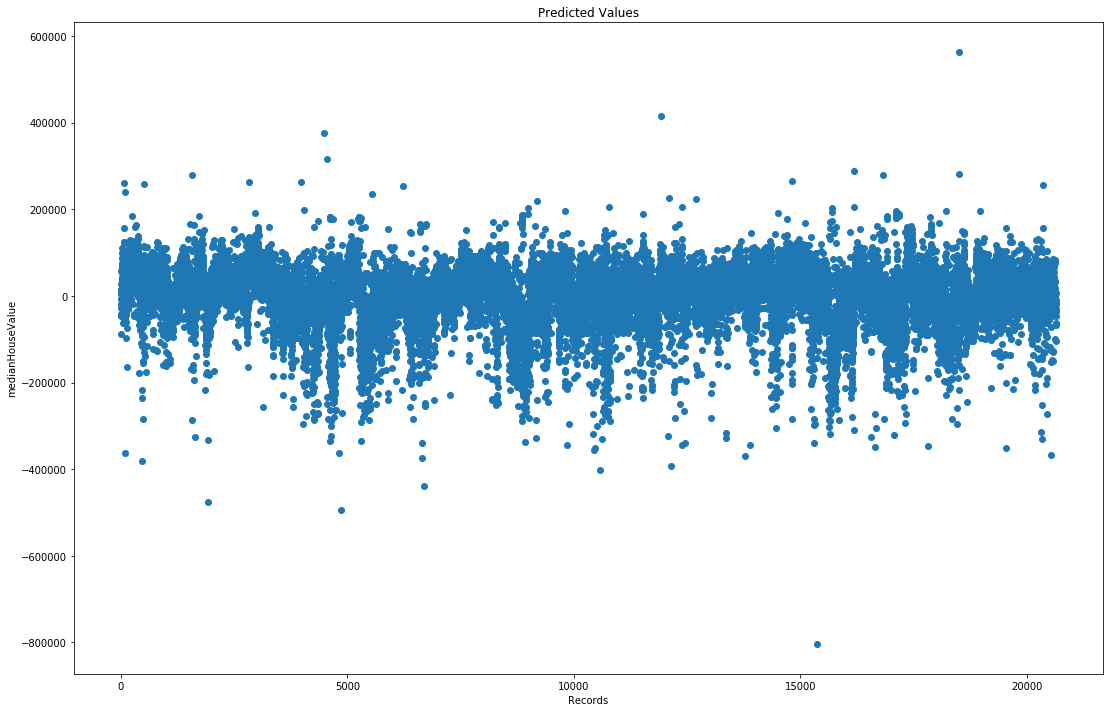

In [12]:
X = f.iloc[:,0:8].values
T = f.iloc[:,8].values
ls = LinearRegress()
ls.train(X, T)
op_values = ls.use(X)-T
print(op_values.shape)
print(T.shape)
ones = []
for i in range(len(X)):
    ones.append(i+1)
fig = plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.scatter(ones,op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")
fig.tight_layout()

Alpha rate is 0.001
(20640,)
(20640,)


Text(0.5,0,'Records')

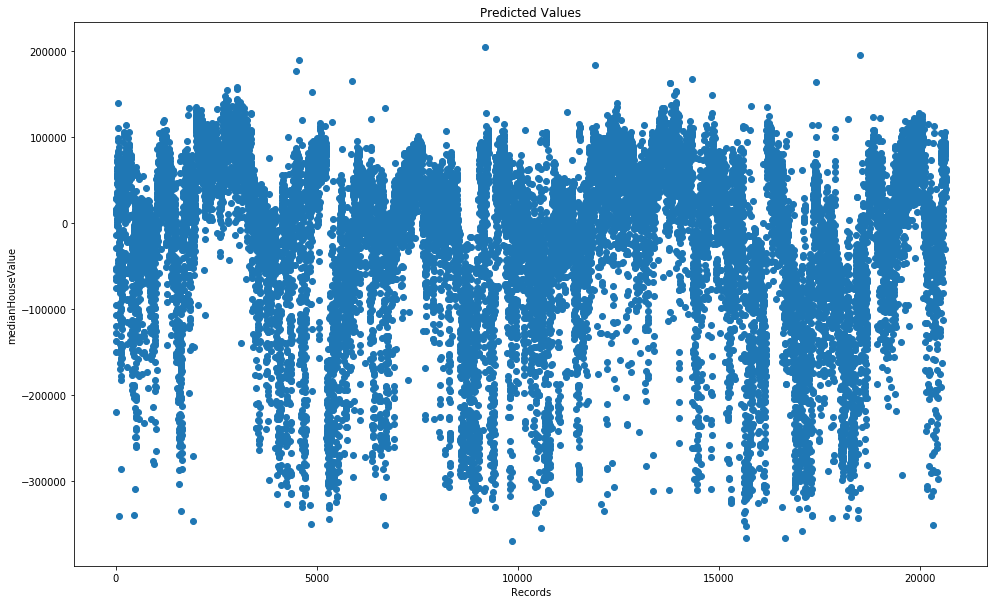

In [13]:
X = f.iloc[:,0:8].values
T = f.iloc[:,8].values
lms = LMS(0.001)
print("Alpha rate is 0.001")
lms.train(X, T)
#plt.plot(lms.use(X))
op_values = lms.use(X).ravel()-T
print(op_values.shape)
print(T.shape)
ones = []
for i in range(len(X)):
    ones.append(i+1)
fig = plt.figure(figsize=(36,10))
plt.subplot(1,2,1)
plt.scatter(ones,op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")

Alpha rate is 0.01
(20640,)
(20640,)


Text(0.5,0,'Records')

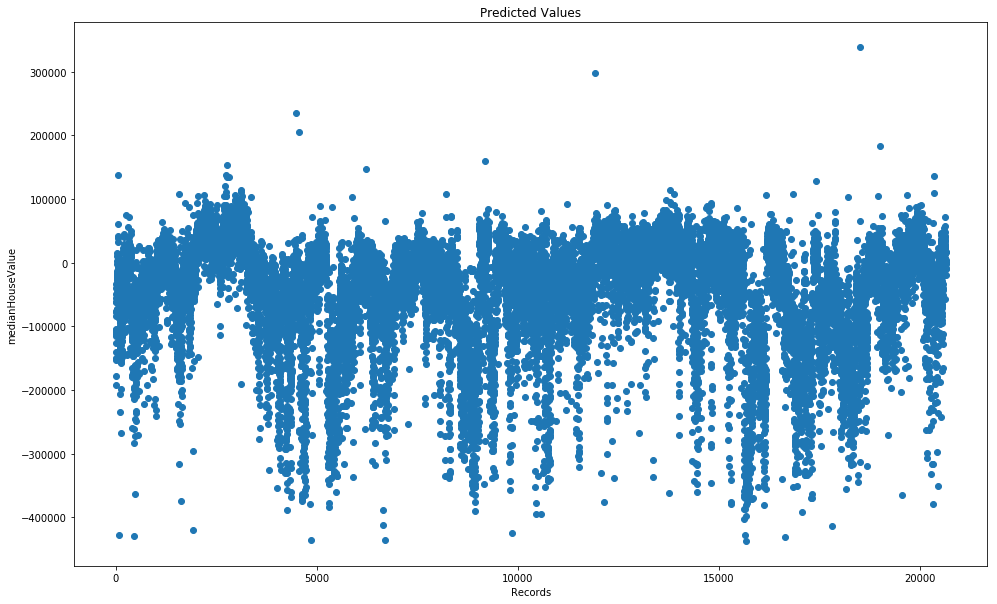

In [14]:
X = f.iloc[:,0:8].values
T = f.iloc[:,8].values
lms = LMS(0.01)
print("Alpha rate is 0.01")
lms.train(X, T)
#plt.plot(lms.use(X))
op_values = lms.use(X).ravel()-T
print(op_values.shape)
print(T.shape)
ones = []
for i in range(len(X)):
    ones.append(i+1)
fig = plt.figure(figsize=(36,10))
plt.subplot(1,2,1)
plt.scatter(ones,op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")

Alpha rate is 0.1
(20640,)
(20640,)


Text(0.5,0,'Records')

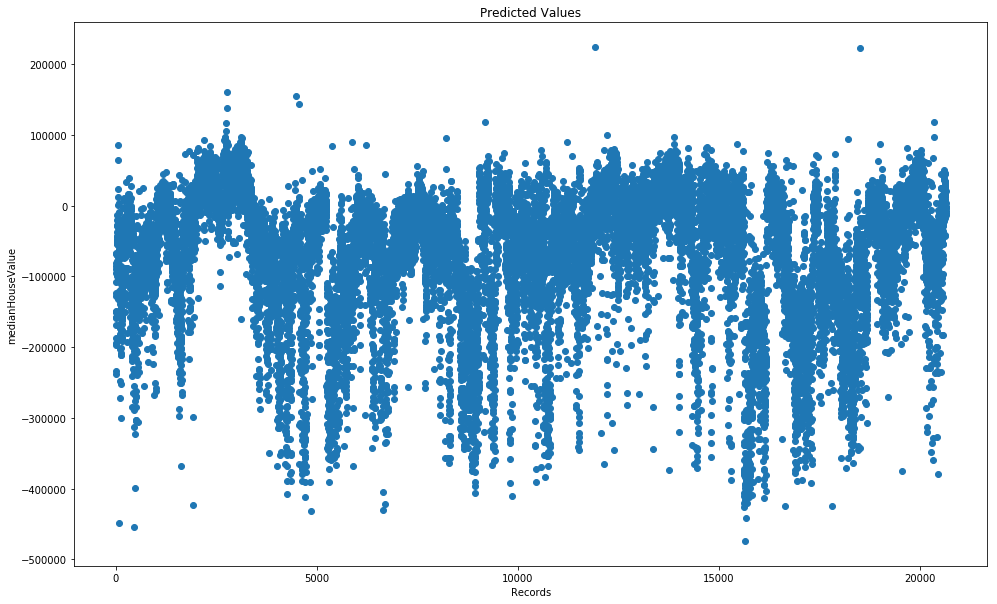

In [15]:
X = f.iloc[:,0:8].values
T = f.iloc[:,8].values
lms = LMS(0.1)
print("Alpha rate is 0.1")
lms.train(X, T)
#plt.plot(lms.use(X))
op_values = lms.use(X).ravel()-T
print(op_values.shape)
print(T.shape)
ones = []
for i in range(len(X)):
    ones.append(i+1)
fig = plt.figure(figsize=(36,10))
plt.subplot(1,2,1)
plt.scatter(ones,op_values)
plt.title('Predicted Values')
plt.ylabel(f.columns.values[8])
plt.xlabel("Records")


* Residual plot is a graph that have residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.
* Residual means the difference between the predicted value and the expected value.
* From the above graphs, we can clearly say that most of the data is dispersed around the horizontal axis. So, linear regression is good fit for this data.

## Conclusions

* Firstly, I have learned how to implement Least square and Least Mean Square linear regression models.
* For LS, We need to calculate inverse which is order of n^3. So, when the data is large LS is not ideal.
* We need to use LMS when data is large and LS when data is small.
* There is a possibility of over fitting when we use LMS but if we build a appropiate model we can reduce over fitting.
* If we normalize the data then we can reach the minima(local or global) easily compare to data which is not normalized. This is the main reason for normalizing the data even though data is clean.
* We need to take the value of alpha such that it shouldn't diverge the minima and also the considering the rate at which we are converging the minima.

## References

* http://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html
* https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Model.ipynb
* https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipynb
* https://stackoverflow.com/questions/37194968/single-variable-category-scatter-plot-pandas
* https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/